In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [314]:
#load the collected spectrum
data = np.load('multiple_spectra_with_oh_lines.npy')

meandata=np.mean(data, axis=0)

In [292]:
threshold=0.7*10**-14

thresholded_data=np.where(data > threshold, data, 0)

In [331]:
x_train, x_test, y_train, y_test= train_test_split(thresholded_data, thresholded_data, test_size=0.2)


In [332]:
# Initialize the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42, max_depth=1)
dt_model.fit(x_train, y_train)
pred=dt_model.predict(data[0].reshape(1,-1))

#pred_thresh=np.where(pred[0]>threshold, pred[0], 0)

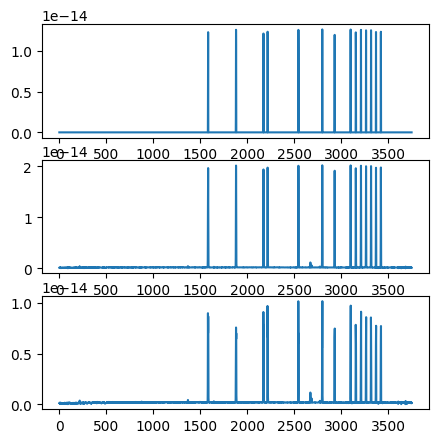

In [333]:
fig, ax=plt.subplots(nrows=3, ncols=1, figsize=(5,5))

ax[0].plot(pred[0])
ax[1].plot(data[0])
ax[2].plot(data[0]-pred[0])
#plt.close()

In [ ]:
#Unsuccesful attempt at DECISION TREE REGRESSION for sky subtraction